# PCA and Clustering

## 1. Configuration
### 1.1. Import Libraries

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib as matplot
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy


print("Python ver: {}".format(sys.version))
print("Numpy ver: {}".format(np.__version__))
print("Pandas ver: {}".format(pd.__version__))
print("MatPlotLib ver: {}".format(matplot.__version__))
print("SeaBorn ver: {}".format(sns.__version__))
print("StatsModel ver: {}".format(sm.__version__))
print("Scipy ver: {}".format(scipy.__version__))
print("SkLearn ver: {}".format(sklearn.__version__))

Python ver: 3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0]
Numpy ver: 1.19.5
Pandas ver: 1.1.4
MatPlotLib ver: 3.3.3
SeaBorn ver: 0.11.1
StatsModel ver: 0.12.1
Scipy ver: 1.5.4
SkLearn ver: 0.24.1


In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

## 2. Data Preparation

### 2.1 Load the data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 3. Standardize the Data
Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales (i.e PCA is very sensitive to scales). 

In [4]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

X = StandardScaler().fit_transform(X)

## 4. PCA Projection (2 predictors)
### 4.1. Create a 2D projection

In [5]:
print(X.shape)

(2085, 30)


Our datasets has 30 predictors and we want to reduce it to 2 predictors

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [7]:
principalDataFrame = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDataFrame, y], axis = 1)

finalDataFrame

,principal component 1,principal component 2,WeakLinks
0,0.455592,0.923799,RightShoulderElevation
1,0.340167,-3.006348,RightArmFallForward
2,-1.264383,-0.826703,LeftArmFallForward
3,1.870635,2.444828,RightShoulderElevation
4,-2.190334,2.021990,ForwardHead
...,...,...,...
2080,-0.288845,0.355983,RightArmFallForward
2081,-3.582806,1.830659,LeftArmFallForward
2082,0.947280,2.615195,LeftArmFallForward
2083,0.449840,-4.333861,RightKneeMovesOutward


### 4.2 Visualize 2D Projection

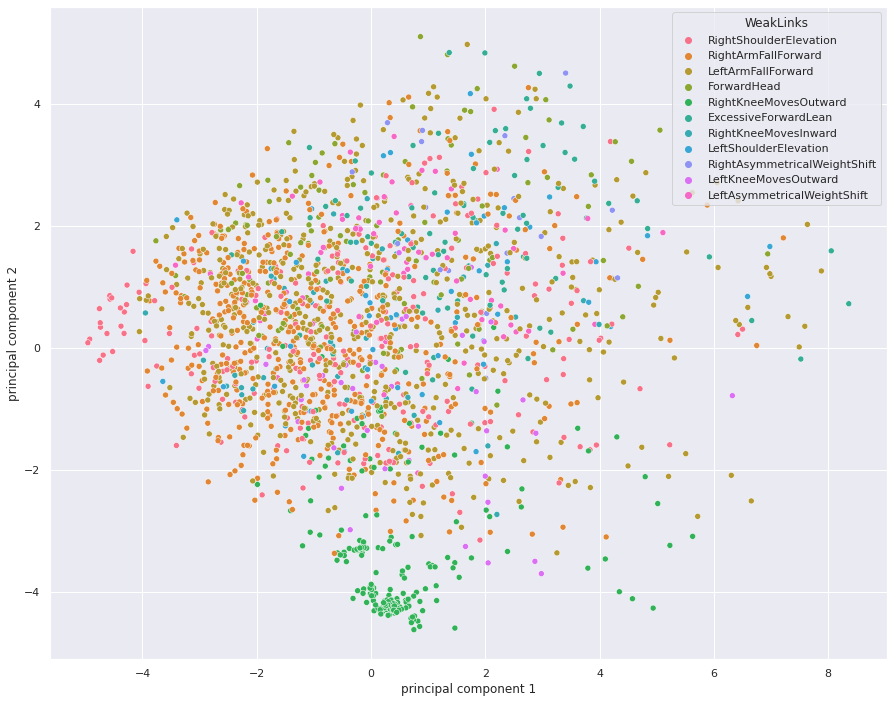

In [8]:
fig = plt.figure(figsize = (15,12))
sns.scatterplot(data=finalDataFrame, x="principal component 1", y="principal component 2", hue="WeakLinks")
plt.show()

### 4.3. Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [9]:
ev = pca.explained_variance_ratio_

print(ev)
print(np.sum(ev))

[0.14507121 0.13423252]
0.27930372835055506


Together, the first two principal components contain 27.93% of the information. The first principal component contains 14.51% of the variance and the second principal component contains 13.42% of the variance.